##  import , function and variable

In [22]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import make_scorer
import pickle
import matplotlib.pyplot as plt
import lightgbm as lgb

In [14]:
def restructure(df):
    df = df.sort_values(by =  ['station_id','time'])
#     df.sort_values(by =  ['time'])
    df = df.set_index(['station_id','time'])
    return df

In [23]:
stationId = ['fangshan_aq',
             'daxing_aq',
             'yizhuang_aq',
             'tongzhou_aq',
             'shunyi_aq',
             'pingchang_aq',
             'mentougou_aq',
             'pinggu_aq',
             'huairou_aq',
             'miyun_aq',
             'yanqin_aq',
             'dingling_aq',
             'badaling_aq',
             'miyunshuiku_aq',
             'donggaocun_aq',
             'yongledian_aq',
             'yufa_aq',
             'liulihe_aq',
             'qianmen_aq',
             'yongdingmennei_aq',
             'xizhimenbei_aq',
             'nansanhuan_aq',
             'dongsihuan_aq',
             'dongsi_aq',
             'tiantan_aq',
             'guanyuan_aq',
             'wanshouxigong_aq',
             'aotizhongxin_aq',
             'nongzhanguan_aq',
             'wanliu_aq',
             'beibuxinqu_aq',
             'zhiwuyuan_aq',
             'fengtaihuayuan_aq',
             'yungang_aq',
             'gucheng_aq']

In [ ]:

stations = []
a = test_x.copy()
a = restructure(a)
for i in range(len(a.index)):
    temp = a.index[i]
    temp = temp[0]+'#'+str(temp[1])
    stations.append(temp)


##  step1 model loading 

In [3]:
filename_1 = 'LGBM_model_PM2.5_1.sav'
filename_2 = 'LGBM_model_PM10_1.sav'
filename_3 = 'LGBM_model_O3_1.sav'
LGBM_model_PM25_1 = pickle.load(open(filename_1, 'rb'))
LGBM_model_PM10_1 = pickle.load(open(filename_2, 'rb'))
LGBM_model_O3_1 = pickle.load(open(filename_3, 'rb'))






##  step2 test prepocessing

### orinigal structure(where to come back)

In [121]:
test_x = pd.read_csv('../data/test_by_station/all_stations.csv')

In [122]:
test_x = test_x.drop('time',axis = 1)
test_x = test_x.rename({'day_time':'time'})

In [58]:
#  this is used to generate the station_id in submitt sample
stations_id_hour = []
a = test_x.copy()
a = restructure(a)
for i in range(len(a.index)):
    temp = a.index[i]
    temp = temp[0]+'#'+str(temp[1])
    stations_id_hour.append(temp)

### LGBM  test prepare 

In [41]:
# use the ave of last 48 hours in train set to estimate the two days in test set
#load the train set
file_path = '../data/train_by_station/allstation.csv'
train_df = pd.read_csv(file_path)

In [42]:
#restructure it 
train_df = restructure(train_df)

In [43]:
# same structure in train and test
LGBM_test = test_x.copy()
LGBM_test = restructure(LGBM_test)

In [113]:
test_x

,time,station_id,ob_w,h,p,t,ws,day_time
0,0,fangshan_aq,0.0,41.5890,1000.5150,15.8970,0.6200,2.0
1,0,zhiwuyuan_aq,0.0,50.0940,1002.4840,17.5400,0.7120,2.0
2,0,nansanhuan_aq,0.0,39.6920,1007.4730,16.7570,1.1930,2.0
3,0,huairou_aq,0.0,49.8420,990.6120,16.7600,0.2280,2.0
4,0,aotizhongxin_aq,0.0,37.3740,1006.2830,17.5730,1.0400,2.0
5,0,tongzhou_aq,0.0,44.0400,1010.1140,12.7830,1.4170,2.0
6,0,yongledian_aq,0.0,45.1220,1010.8650,13.3060,1.6970,2.0
7,0,xizhimenbei_aq,0.0,50.3555,1005.5820,17.3660,0.9125,2.0
8,0,dongsi_aq,0.0,38.4550,1008.2970,17.6770,1.2190,2.0
9,0,badaling_aq,0.0,54.2960,940.2970,15.0000,1.1640,2.0


In [44]:
#  add new feature
for Id in stationId:
    temp = train_df.loc[Id,'PM2.5'][0:-48]
    temp = temp.mean()
#     print(temp)
    LGBM_test.loc[Id,'mean_PM2.5'] =temp
for Id in stationId:
    temp = train_df.loc[Id,'PM10'][0:-48]
    temp = temp.mean()
#     print(temp)
    LGBM_test.loc[Id,'mean_PM10'] =temp
for Id in stationId:
    temp = train_df.loc[Id,'O3'][0:-48]
    temp = temp.mean()
#     print(temp)
    LGBM_test.loc[Id,'mean_O3'] =temp

In [47]:
# now LGBM test is a structual dataset with 3 mean new feature
# use this to choose feature when predictingh
features_PM25 = ['ob_w', 'h', 'p', 't', 'ws','time','mean_PM2.5']
features_PM10 = ['ob_w', 'h', 'p', 't', 'ws','time','mean_PM10']
features_O3 = ['ob_w', 'h', 'p', 't', 'ws','time','mean_O3']



In [59]:
LGBM_pre_PM25 = LGBM_model_PM25_1.predict(LGBM_test[features_PM25])
LGBM_pre_PM10 = LGBM_model_PM10_1.predict(LGBM_test[features_PM10])
LGBM_pre_O3 = LGBM_model_O3_1.predict(LGBM_test[features_O3])

In [60]:
#  concate the three predictions and stationid together
stations_id_hour= pd.Series(stations_id_hour)
LGBM_pre_PM25 = pd.Series(LGBM_pre_PM25)
LGBM_pre_PM10 = pd.Series(LGBM_pre_PM10)
LGBM_pre_O3 = pd.Series(LGBM_pre_PM25)


In [68]:

LGBM_pre_df =  pd.concat([stations_id_hour, LGBM_pre_PM25,LGBM_pre_PM10,LGBM_pre_O3 ], axis=1)

In [69]:
LGBM_pre_df = LGBM_pre_df.rename(index = str,columns = {0:'station_id',
                                                        1:'PM2.5',2:'PM10',3:'O3'})

In [71]:
# LGBM_pre_df
# aotizhongxin_aq#0

In [98]:
real_1 = '../data/prediction/20180501.csv'
real_2 = '../data/prediction/20180502.csv'
df_1 = pd.read_csv(real_1)
df_2 = pd.read_csv(real_2)

df_1 = df_1[df_1['type']=='PM2.5']
df_1 = df_1['aotizhongxin_aq']
df_2 = df_2[df_2['type']=='PM2.5']
df_2 = df_2['aotizhongxin_aq']

In [101]:
plt_temp= LGBM_pre_df[0:48]['PM2.5']


In [ ]:
PM25_48hour = pd.concat([df_1,df_2],axis =0)

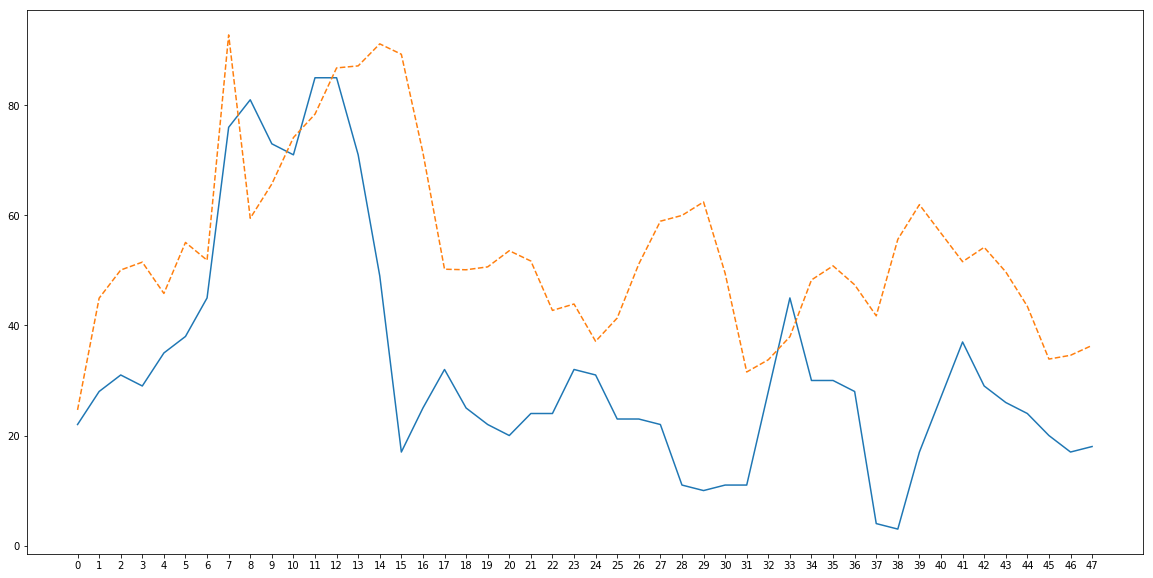

In [102]:
PM25_48hour  = PM25_48hour.reset_index().drop(['index'],axis = 1)
plt.figure(figsize=(20,10)) 
plt.plot(PM25_48hour , '-')
plt.plot(plt_temp, '--')

In [111]:
# LGBM_pre_df

In [104]:
LGBM_pre_df['PM2.5'][-48:] = 0

/Users/qingshuang.pang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
LGBM_pre_df['PM10'][-48:] = 0
LGBM_pre_df['O3'][-48:] = 0

/Users/qingshuang.pang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/qingshuang.pang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [110]:
# LGBM_pre_df[-49:]

In [109]:
LGBM_pre_df.to_csv('../data/prediction/group53_submission.csv')
